In [1]:
# random signals 1
import numpy as np
import matplotlib.pyplot as plt
import scipy
import soundfile as sf
from IPython.display import Audio
from IPython.display import display

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/06_random_1/roulette.bin
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/06_random_1/water.bin

# >>>>>>>>>>>>>>>>> #data_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
Nroulette = 1000
with open('roulette.bin', 'rb') as f:
    ROULETTE = np.fromfile(f, np.uint8).reshape((Nroulette, -1)).T
OMEGAroulette = ROULETTE.shape[0]
print(ROULETTE.shape, OMEGAroulette)

# example of games 970...990 from days 18200..18210
print(ROULETTE[18200:18210,970:990])


--2024-11-01 11:54:02--  https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/06_random_1/roulette.bin
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/06_random_1/roulette.bin [following]
--2024-11-01 11:54:03--  https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/06_random_1/roulette.bin
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/06_random_1/roulette.bin [following]
--2024-11-01 11:54:04--  https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/06_random_1/roulette.bin
Reusing e

(1068, 320) 1068


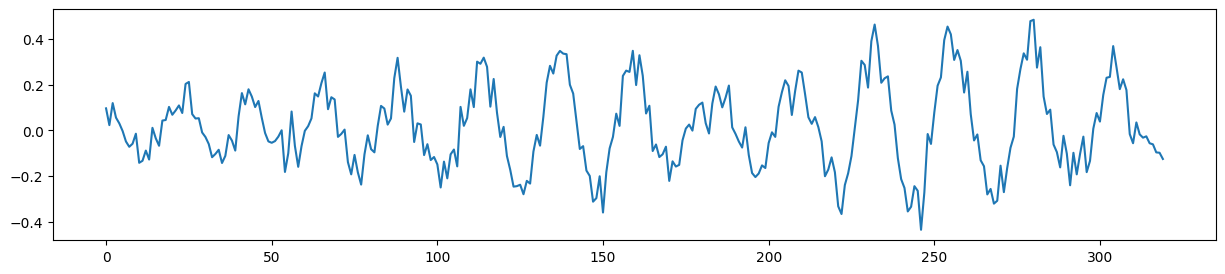

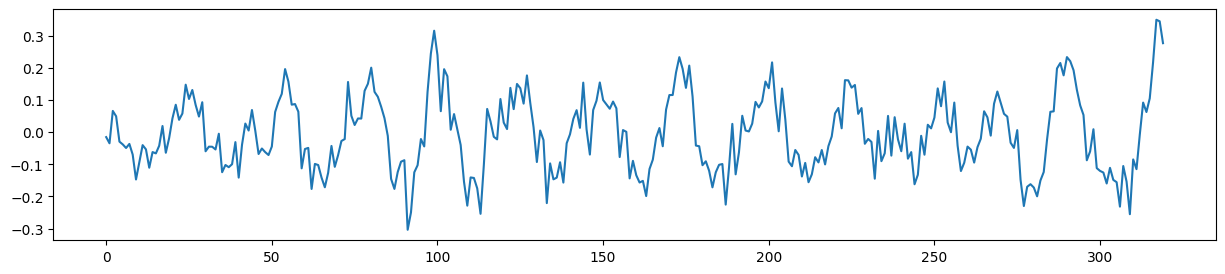

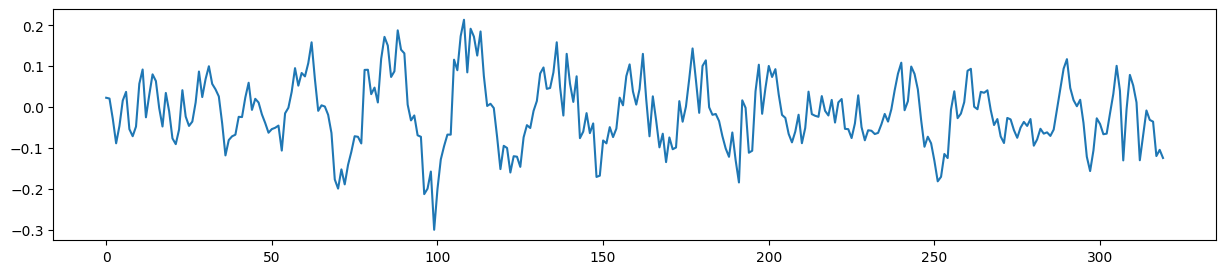

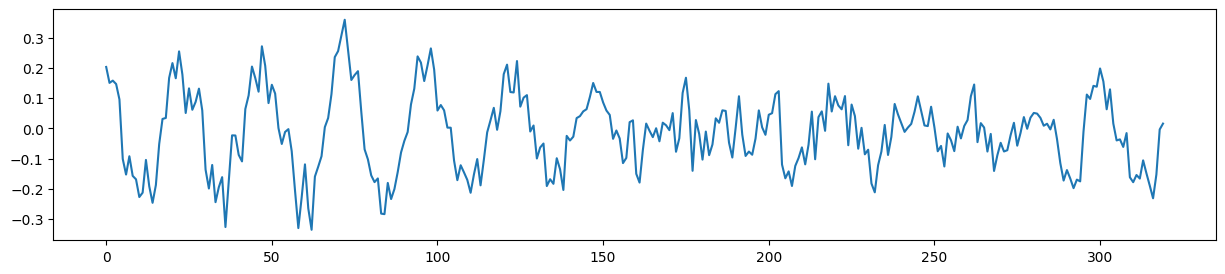

In [2]:
# >>>>>>>>>>>>>>>>> #data_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
Nwater = 320
Fs = 16000
with open('water.bin', 'rb') as f:
    WATER = np.fromfile(f, np.float32).reshape((Nwater,-1)).T
OMEGAwater = WATER.shape[0]
print(WATER.shape, OMEGAwater)

# visualize 4 different realizations
for omega in [4,100,900,1050]:
    plt.figure(figsize=(15,3))
    plt.plot(WATER[omega])
    display(Audio(WATER[omega], rate=Fs))

Text(0, 0.5, '$F(x,n)$')

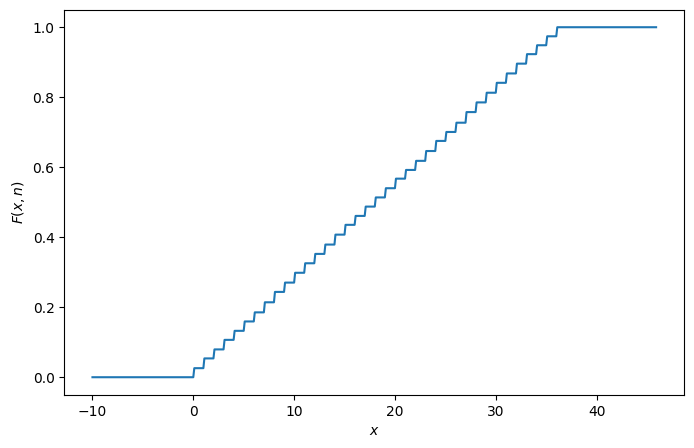

In [3]:
# >>>>>>>>>>>>>>>>> #cdf_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
n = 501      # <--- selection of the game, change to other if you want
data = ROULETTE[:,n]
xall = np.arange(-10,46,0.1)   # <--- reasonable range for a roulette.
Fxn = np.zeros(xall.shape)  # preparing space for CDF
for (ii,x) in enumerate(xall):
    Fxn[ii] = np.sum(data < x) / OMEGAroulette
plt.figure(figsize=(8,5))
plt.plot(xall,Fxn)
plt.gca().set_xlabel('$x$')
plt.gca().set_ylabel('$F(x,n)$')


Text(0, 0.5, '$F(x,n)$')

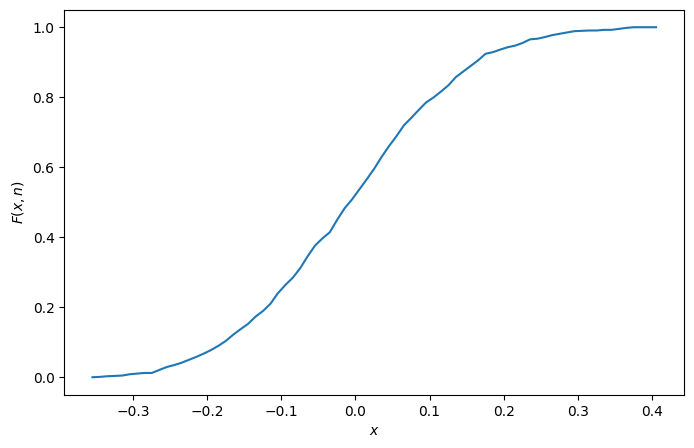

In [4]:
# >>>>>>>>>>>>>>>>> #cdf_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
n = 200      # <--- selection of the sample, change to other if you want
data = WATER[:,n]
xall = np.arange(np.min(data),np.max(data),0.01)   # let the data decide ...
Fxn = np.zeros(xall.shape)  # preparing space for CDF
for (ii,x) in enumerate(xall):
    Fxn[ii] = np.sum(data < x) / OMEGAwater
plt.figure(figsize=(8,5))
plt.plot(xall,Fxn)
plt.gca().set_xlabel('$x$')
plt.gca().set_ylabel('$F(x,n)$')

0.02702702702702703


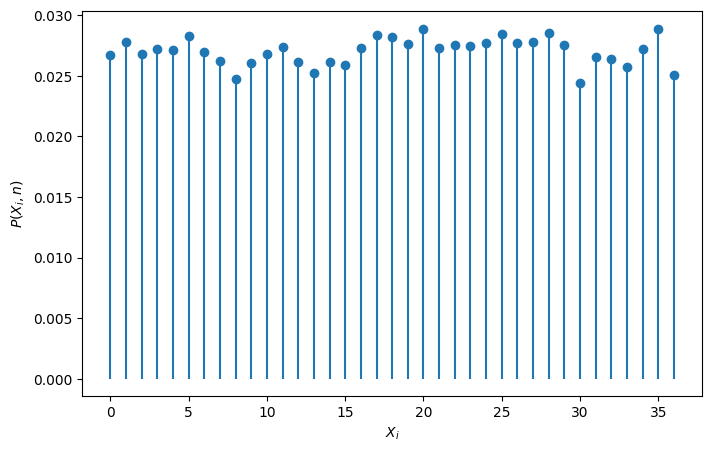

In [5]:
# >>>>>>>>>>>>>>>>> #proba_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
n = 900      # <--- selection of the game, change to other if you want
data = ROULETTE[:,n]
Xiall = np.arange(0,36+1)   # roulette has no other values
Pxn = np.zeros(Xiall.shape)  # preparing space for CDF
for (ii,Xi) in enumerate(Xiall):
    Pxn[ii] = np.sum(data == Xi) / OMEGAroulette
plt.figure(figsize=(8,5))
plt.stem(Xiall,Pxn,basefmt=" ")
plt.gca().set_xlabel('$X_i$')
plt.gca().set_ylabel('$P(X_i,n)$')
print(1/37)


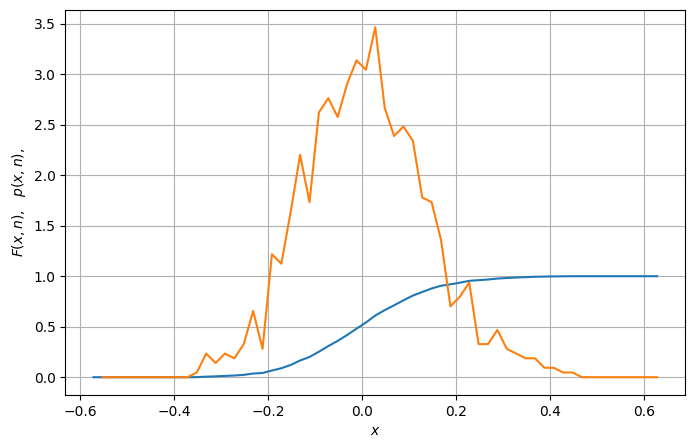

In [6]:
# >>>>>>>>>>>>>>>>> #pdf_continuous_derivation <<<<<<<<<<<<<<<<<<<<<<<<<
n = 159      # <--- selection of the sample, change to other if you want
DELTA = 0.02 # step on the x axis
data = WATER[:,n]
datamin = np.min(data)
datamax = np.max(data)
datarange = datamax - datamin
xall = np.arange(datamin-0.25*datarange,datamax+0.25*datarange,DELTA)   # let the data decide ...
# cdf estrimation
Fxn = np.zeros(xall.shape)  # preparing space for CDF
for (ii,x) in enumerate(xall):
    Fxn[ii] = np.sum(data < x) / OMEGAwater
pxn = ( Fxn[1:] - Fxn[0:-1] ) / DELTA
plt.figure(figsize=(8,5))
plt.plot(xall,Fxn)
plt.plot(xall[1:],pxn)
plt.gca().set_xlabel('$x$')
plt.gca().set_ylabel('$F(x,n)$,   $p(x,n),$')
plt.gca().grid()

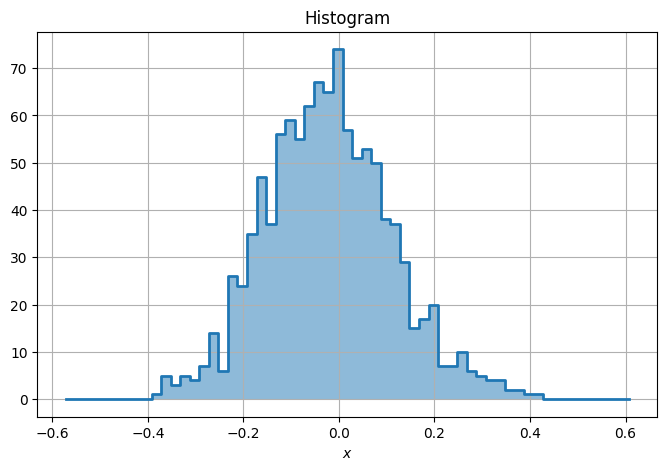

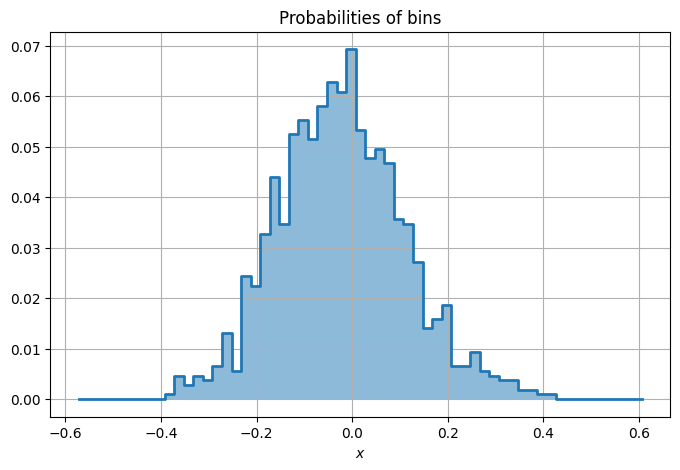

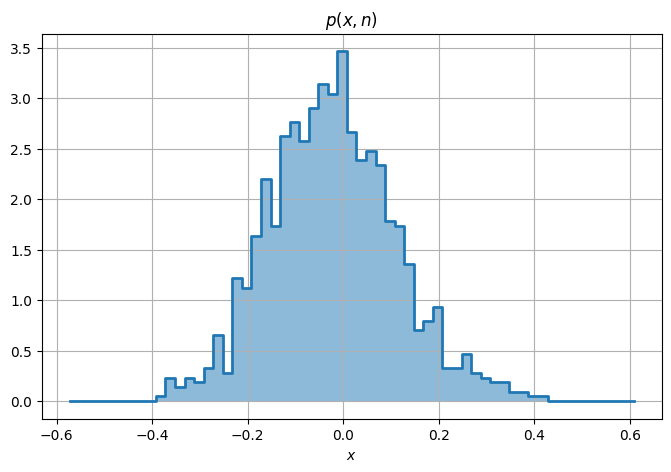

In [7]:
# >>>>>>>>>>>>>>>>> #pdf_continuous_histogram <<<<<<<<<<<<<<<<<<<<<<<<<
n = 159      # <--- selection of the sample, change to other if you want
DELTA = 0.02 # step on the x axis
data = WATER[:,n]
datamin = np.min(data)
datamax = np.max(data)
datarange = datamax - datamin
bins = np.arange(datamin-0.25*datarange,datamax+0.25*datarange,DELTA)   # let the data decide ...

#--- histogram ---
hist,_ = np.histogram(data, bins)
# delete the rightmost edge for visualization ...
binsvisu = bins[:-1]
plt.figure(figsize=(8,5))
plt.fill_between(binsvisu, hist, step='pre', alpha=0.5)
plt.plot(binsvisu, hist, drawstyle='steps', linewidth=2)
plt.title('Histogram')
plt.gca().set_xlabel('$x$')
plt.gca().grid()

#--- probabilities ---
Pxn = hist / OMEGAwater
plt.figure(figsize=(8,5))
plt.fill_between(binsvisu, Pxn, step='pre', alpha=0.5)
plt.plot(binsvisu, Pxn, drawstyle='steps', linewidth=2)
plt.title('Probabilities of bins')
plt.gca().set_xlabel('$x$')
plt.gca().grid()

#--- PDF ---
pxn = hist / OMEGAwater / DELTA
plt.figure(figsize=(8,5))
plt.fill_between(binsvisu, pxn, step='pre', alpha=0.5)
plt.plot(binsvisu, pxn, drawstyle='steps', linewidth=2)
plt.title('$p(x,n)$')
plt.gca().set_xlabel('$x$')
plt.gca().grid()

In [8]:
# >>>>>>>>>>>>>>>>> #total_mass_check <<<<<<<<<<<<<<<<<<<<<<<<<
print("sum of histogram = ",np.sum(hist))
print("sum of bin probabilities = ",np.sum(Pxn))
print("sum of p(x,n) values = ",np.sum(pxn))
print("integral of p(x,n) = ", np.sum(pxn) * DELTA)


sum of histogram =  1068
sum of bin probabilities =  1.0
sum of p(x,n) values =  50.0
integral of p(x,n) =  1.0


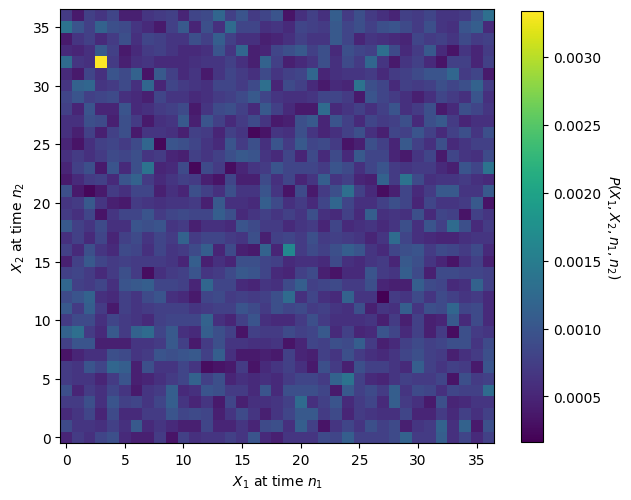

In [27]:
# >>>>>>>>>>>>>>>>> #joint_probabilities_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
X1all = np.arange(0,36+1)   # roulette has no other values
X2all = np.arange(0,36+1)   # roulette has no other values
n1 = 20   # < ---- set n1 here
n2 = 23   # < ---- set n2 here
data1 = ROULETTE[:,n1]
data2 = ROULETTE[:,n2]
PX1X2n1n2 = np.zeros((X1all.size, X2all.size))
for ii,X1 in enumerate(X1all):
    for jj,X2 in enumerate(X2all):
        PX1X2n1n2[ii,jj] = np.sum ((data1 == X1) & (data2 == X2)) / OMEGAroulette
plt.figure(figsize=(7,7))
plt.pcolormesh(X1all, X2all, PX1X2n1n2)
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('$X_1$ at time $n_1$')
plt.gca().set_ylabel('$X_2$ at time $n_2$')
cbar = plt.colorbar(shrink=0.80)
cbar.set_label('$P(X_1, X_2, n_1, n_2)$', rotation=270, labelpad=15)

0.9981273408239699


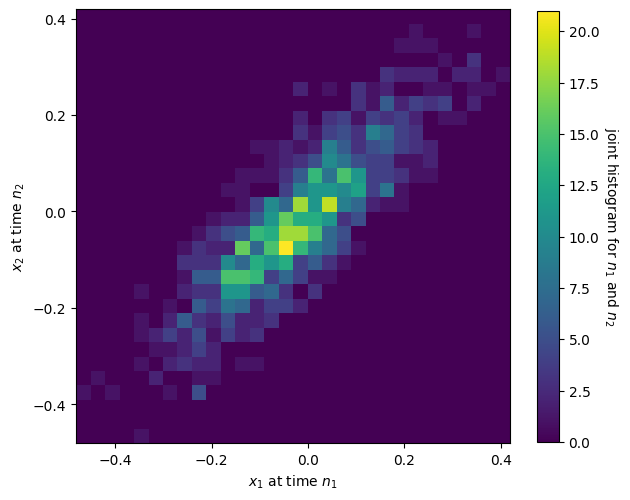

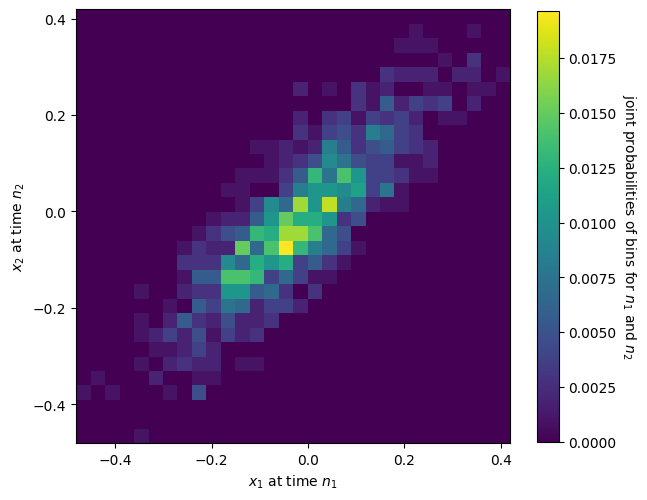

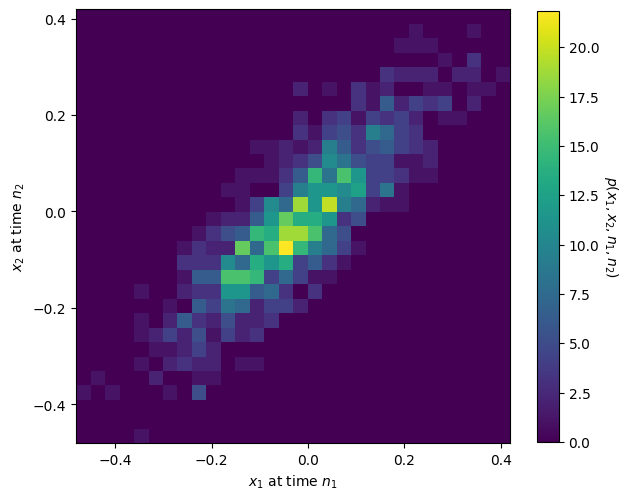

In [10]:
# >>>>>>>>>>>>>>>>> #joint_pdf_histogram <<<<<<<<<<<<<<<<<<<<<<<<<
n1 = 10      # <--- selection of the sample, change to other if you want
n2 = 11      # <--- selection of the sample, change to other if you want
DELTA = 0.03 # step - better for 2D ...
data1 = WATER[:,n1]
data2 = WATER[:,n2]
datamin = np.min(np.concatenate((data1, data2)))   # better analyze both ...
datamax = np.max(np.concatenate((data1, data2)))   # better analyze both ...
bins = np.arange(datamin,datamax,DELTA)   # let the data decide ... no margin here

#--- 2d histogram ---
jointhist,_,_ = np.histogram2d(data1, data2, bins=(bins,bins))
# delete the rightmost edge for visualization ...
binsvisu = bins[:-1]
plt.figure(figsize=(7,7))
plt.pcolormesh(binsvisu, binsvisu, jointhist)
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('$x_1$ at time $n_1$')
plt.gca().set_ylabel('$x_2$ at time $n_2$')
cbar = plt.colorbar(shrink=0.80)
#cbar.set_label('$P(X_1, X_2, n_1, n_2)$', rotation=270, labelpad=15)
cbar.set_label('joint histogram for $n_1$ and $n_2$', rotation=270, labelpad=15)

#--- joint probabilities of bins ---
PX1X2 = jointhist / OMEGAwater
plt.figure(figsize=(7,7))
plt.pcolormesh(binsvisu, binsvisu, PX1X2)
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('$x_1$ at time $n_1$')
plt.gca().set_ylabel('$x_2$ at time $n_2$')
cbar = plt.colorbar(shrink=0.80)
#cbar.set_label('$P(X_1, X_2, n_1, n_2)$', rotation=270, labelpad=15)
cbar.set_label('joint probabilities of bins for $n_1$ and $n_2$', rotation=270, labelpad=15)

#--- joint PDF ---
px1x2n1n2 = jointhist / OMEGAwater / (DELTA * DELTA)
plt.figure(figsize=(7,7))
plt.pcolormesh(binsvisu, binsvisu, px1x2n1n2)
plt.gca().set_aspect('equal')
plt.gca().set_xlabel('$x_1$ at time $n_1$')
plt.gca().set_ylabel('$x_2$ at time $n_2$')
cbar = plt.colorbar(shrink=0.80)
cbar.set_label('$p(x_1, x_2, n_1, n_2)$', rotation=270, labelpad=15)

print(np.sum(px1x2n1n2) * DELTA * DELTA)

Text(39.6, 0, '$a[n]$ = 17.93205479452055')

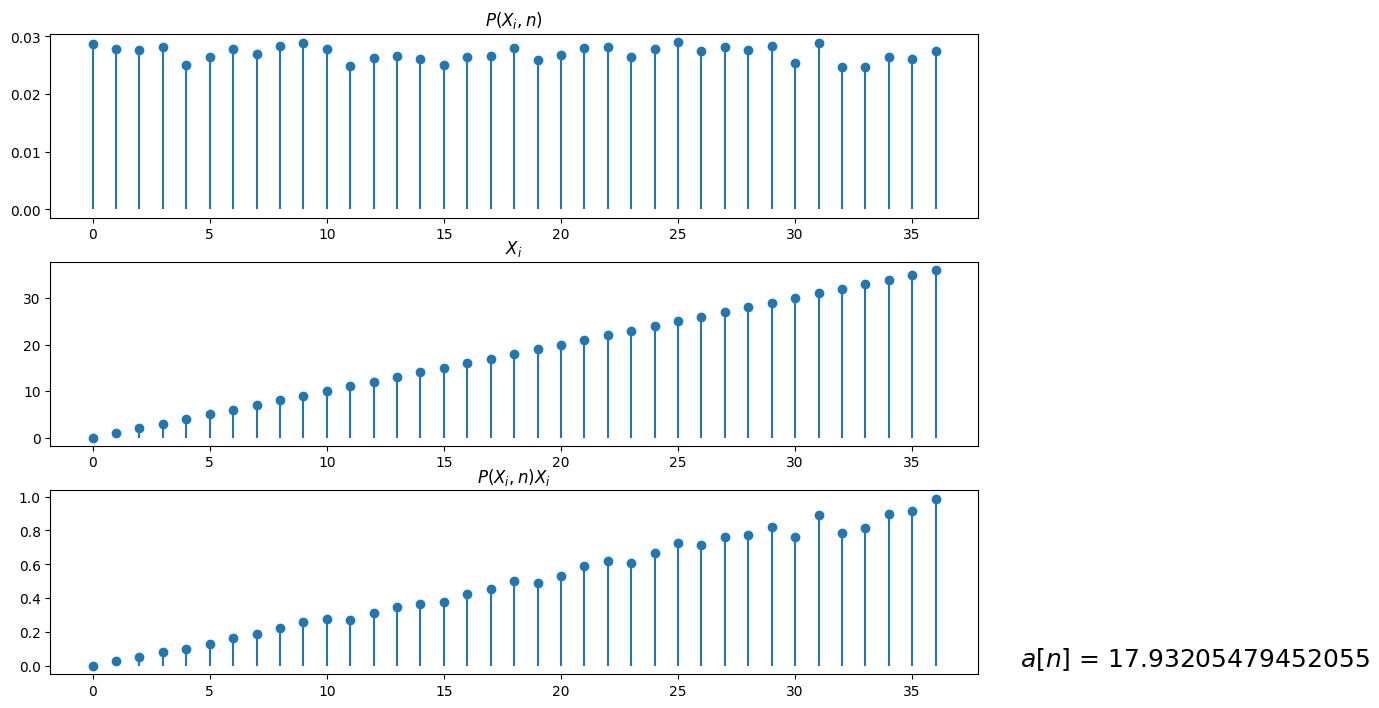

In [11]:
# >>>>>>>>>>>>>>>>> #mean_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
n = 10
# better estimate the probabilities again
data = ROULETTE[:,n]
Xiall = np.arange(0,36+1)   # roulette has no other values
Pxn = np.zeros(Xiall.shape)
for (ii,Xi) in enumerate(Xiall):
    Pxn[ii] = np.sum(data == Xi) / OMEGAroulette

fig, ax = plt.subplots(3,1, figsize=(10,7))
fig.tight_layout()
ax[0].stem(Xiall,Pxn,basefmt=" ")
ax[0].set_title('$P(X_i,n)$')
ax[1].stem(Xiall,Xiall,basefmt=" ")
ax[1].set_title('$X_i$')
ax[2].stem(Xiall,Pxn * Xiall,basefmt=" ")
ax[2].set_title('$P(X_i,n) X_i$')
aroulette = np.sum(Pxn * Xiall)
ax[2].text(1.1*36, 0, f'$a[n]$ = {aroulette}',fontsize=18)

0.999063670411985


Text(0.506024169921875, 0, '$a[n]$ = -0.006608060343881291')

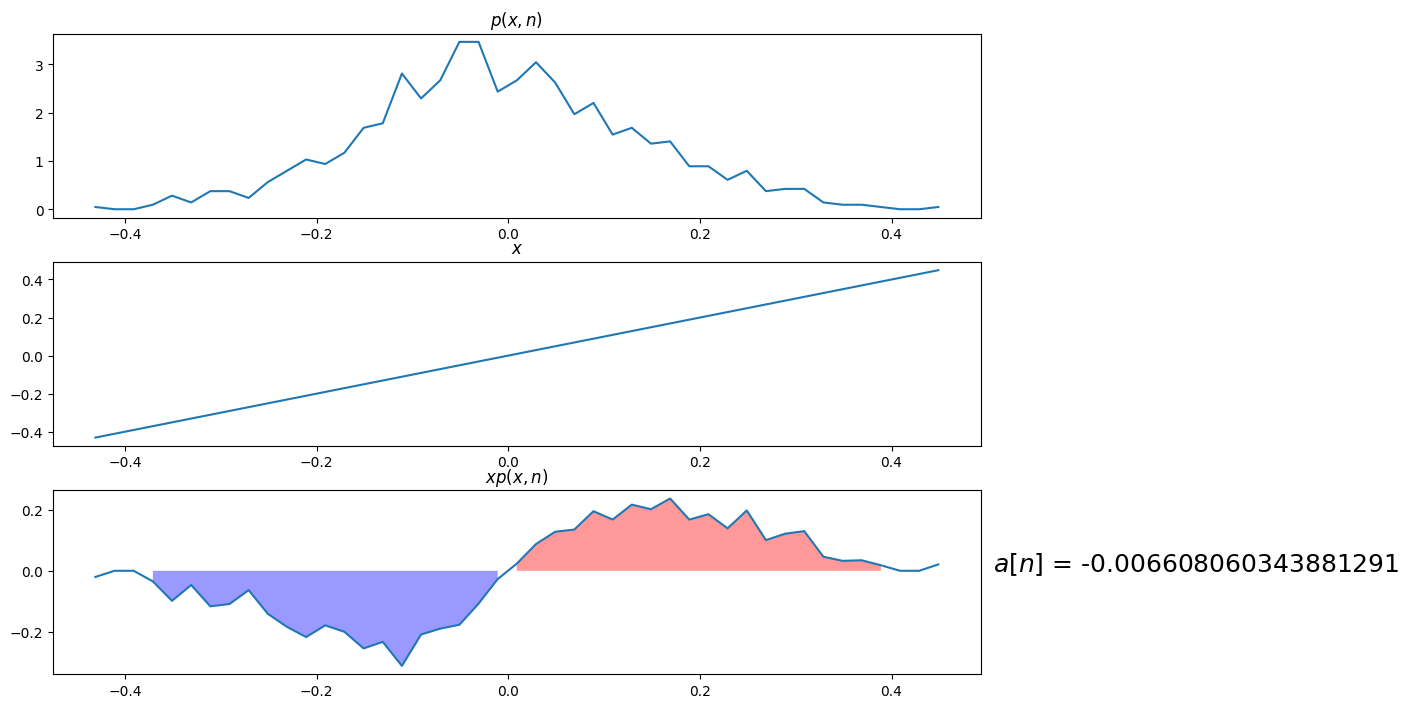

In [12]:
# >>>>>>>>>>>>>>>>> #mean_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
# better estimate the PDF again ...
n = 10      # <--- selection of the sample, change to other if you want
DELTA = 0.02 # step on the x axis
data = WATER[:,n]
datamin = np.min(data)
datamax = np.max(data)
bins = np.arange(datamin,datamax,DELTA)   # no margin
x = bins[:-1] + DELTA / 2                 # want to get it precisely ...

#--- histogram ---
hist,_ = np.histogram(data, bins)
pxn = hist / OMEGAwater / DELTA
print(np.sum(pxn) * DELTA)
fig, ax = plt.subplots(3,1, figsize=(10,7))
fig.tight_layout()
ax[0].plot(x,pxn)
ax[0].set_title('$p(x,n)$')
ax[1].plot(x,x)
ax[1].set_title('$x$')
ax[2].plot(x,x * pxn)
ax[2].fill_between(x, pxn * x, 0, where=(pxn * x > 0), facecolor='r', alpha=0.4)
ax[2].fill_between(x, pxn * x, 0, where=(pxn * x < 0), facecolor='b', alpha=0.4)
ax[2].set_title('$x p(x,n)$')
awater = np.sum(pxn * x) * DELTA
ax[2].text(1.1*datamax, 0, f'$a[n]$ = {awater}',fontsize=18)


Text(39.6, 0, '$D[n]$ = 114.09938344905234')

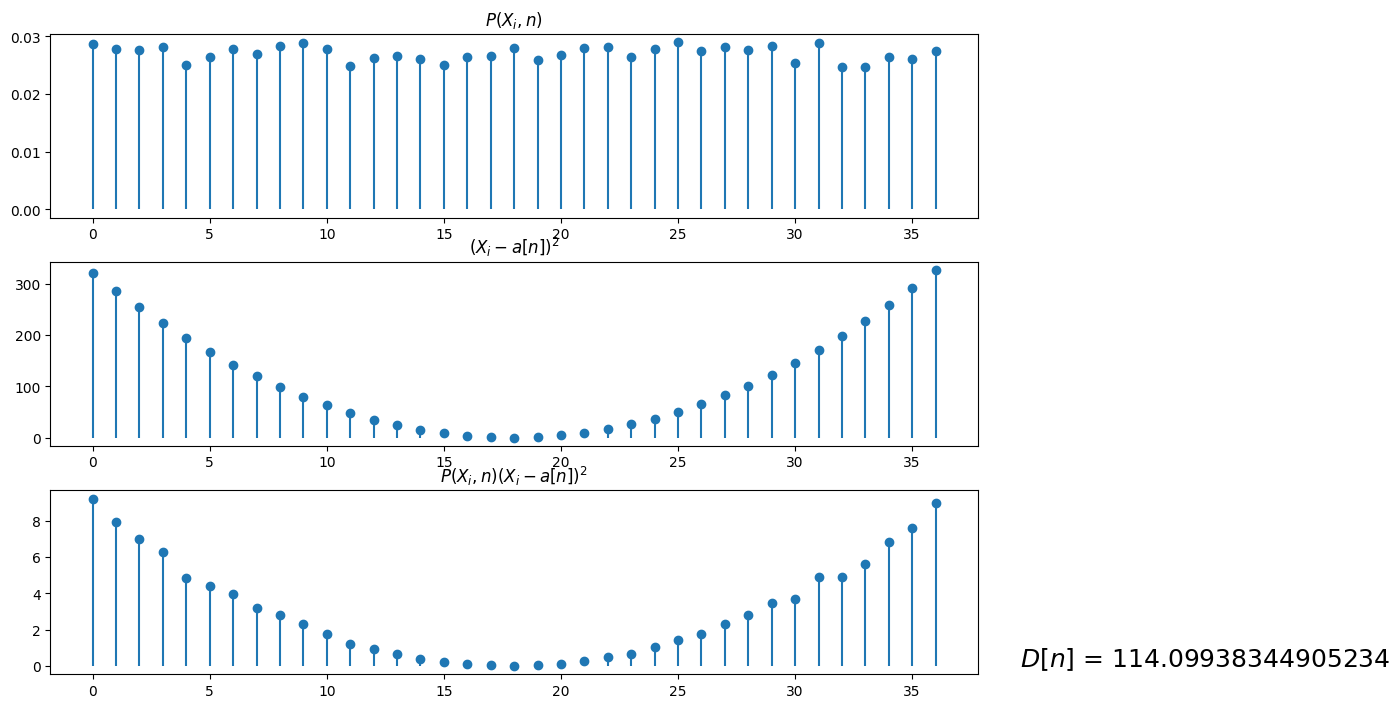

In [13]:
# >>>>>>>>>>>>>>>>> #variance_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
n = 10
fig, ax = plt.subplots(3,1, figsize=(10,7))
fig.tight_layout()
ax[0].stem(Xiall,Pxn,basefmt=" ")
ax[0].set_title('$P(X_i,n)$')
ax[1].stem(Xiall,(Xiall - aroulette) ** 2,basefmt=" ")
ax[1].set_title('$(X_i - a[n])^2$')
ax[2].stem(Xiall,Pxn * (Xiall - aroulette) ** 2,basefmt=" ")
ax[2].set_title('$P(X_i,n) (X_i - a[n])^2$')
Droulette = np.sum(Pxn * (Xiall - aroulette) ** 2)
ax[2].text(1.1*36, 0, f'$D[n]$ = {Droulette}',fontsize=18)

Text(0.506024169921875, 0, '$D[n]$ = 0.019163507930866495')

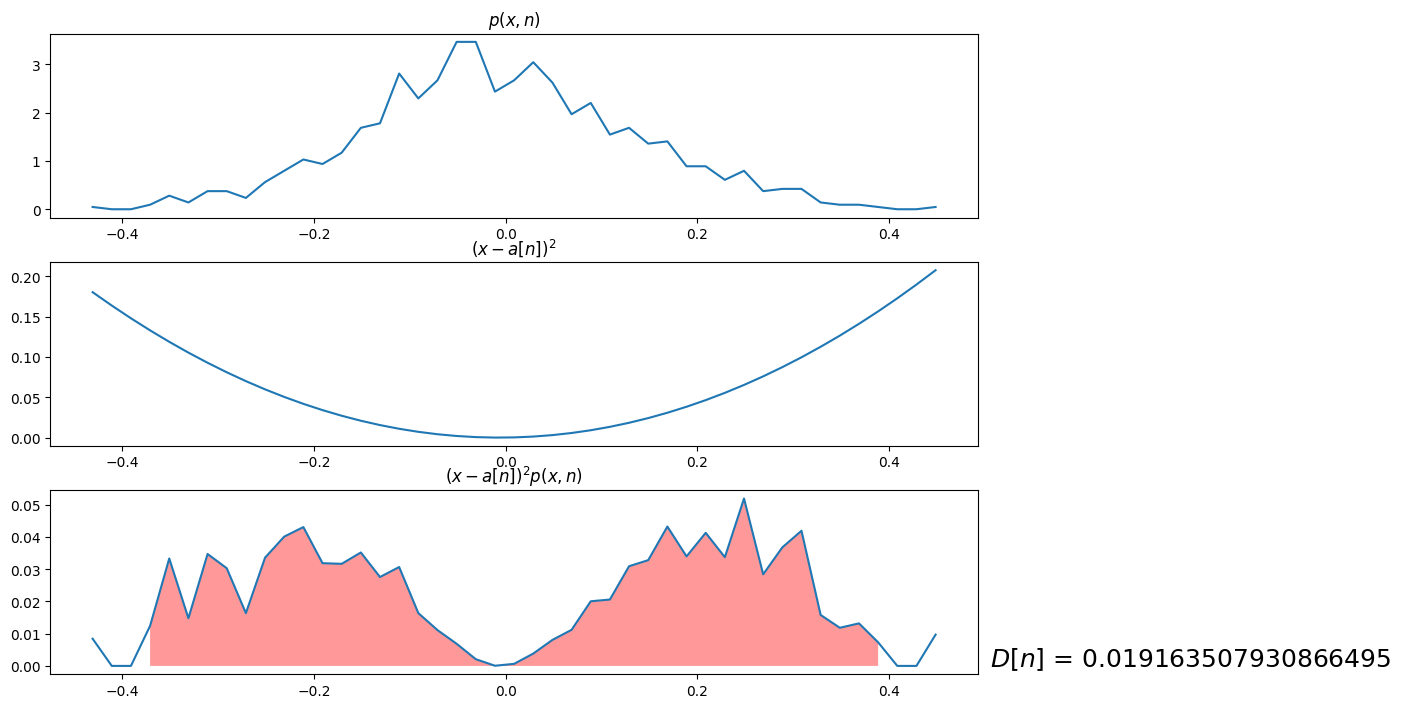

In [14]:
# >>>>>>>>>>>>>>>>> #variance_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
# better estimate the PDF again ...

fig, ax = plt.subplots(3,1, figsize=(10,7))
fig.tight_layout()
ax[0].plot(x,pxn)
ax[0].set_title('$p(x,n)$')
ax[1].plot(x,(x - awater) ** 2)
ax[1].set_title('$(x - a[n])^2$')
expectationproduct = (x - awater) ** 2 * pxn
ax[2].plot(x,expectationproduct)
ax[2].fill_between(x, expectationproduct, 0, where=(expectationproduct > 0), facecolor='r', alpha=0.4)
ax[2].fill_between(x, expectationproduct, 0, where=(expectationproduct < 0), facecolor='b', alpha=0.4)
ax[2].set_title('$(x - a[n])^2 p(x,n)$')
Dwater = np.sum(pxn * (x - awater) ** 2) * DELTA
ax[2].text(1.1*datamax, 0, f'$D[n]$ = {Dwater}',fontsize=18)


In [15]:
# >>>>>>>>>>>>>>>>> #mean_variance_estimation_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
n = 10
data = ROULETTE[:,n]
print("mean = ", np.mean(data), "variance = ", np.var(data))

mean =  17.932054794520546 variance =  114.09938344905234


In [16]:
# >>>>>>>>>>>>>>>>> #mean_variance_estimation_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
n = 10
data = WATER[:,n]
print("mean = ", np.mean(data), "variance = ", np.var(data))

mean =  -0.0061685513 variance =  0.01936811


Text(15, -15, '$R[n_1, n_2]$ = 323.656')

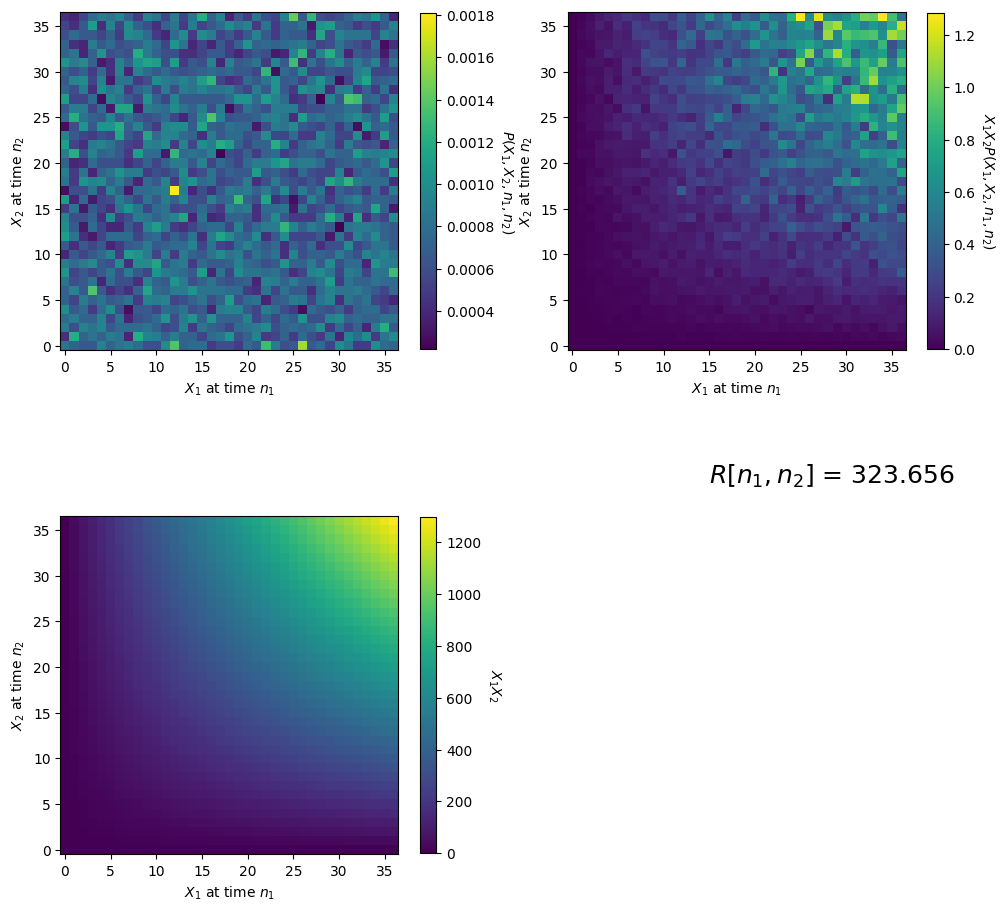

In [17]:
# >>>>>>>>>>>>>>>>> #corrcoef_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
X1all = np.arange(0,36+1)   # roulette has no other values
X2all = np.arange(0,36+1)   # roulette has no other values
n1 = 10   # < ---- set n1 here
n2 = 11   # < ---- set n2 here
data1 = ROULETTE[:,n1]
data2 = ROULETTE[:,n2]
PX1X2n1n2 = np.zeros((X1all.size, X2all.size))
for ii,X1 in enumerate(X1all):
    for jj,X2 in enumerate(X2all):
        PX1X2n1n2[ii,jj] = np.sum ((data1 == X1) & (data2 == X2)) / OMEGAroulette
fig, ax = plt.subplots(2,2, figsize=(12,12))
# show joint probas
im=ax[0,0].pcolormesh(X1all, X2all, PX1X2n1n2)
ax[0,0].set_aspect('equal')
ax[0,0].set_xlabel('$X_1$ at time $n_1$')
ax[0,0].set_ylabel('$X_2$ at time $n_2$')
cbar = plt.colorbar(im, ax = ax[0,0], shrink=0.80)
cbar.set_label('$P(X_1, X_2, n_1, n_2)$', rotation=270, labelpad=15)
# show X1 * X2
X1X2 = np.tile(X1all, (X2all.size, 1)) *  np.tile(X2all, (X1all.size, 1)).T
im=ax[1,0].pcolormesh(X1all, X2all, X1X2)
ax[1,0].set_aspect('equal')
ax[1,0].set_xlabel('$X_1$ at time $n_1$')
ax[1,0].set_ylabel('$X_2$ at time $n_2$')
cbar = plt.colorbar(im, ax = ax[1,0], shrink=0.80)
cbar.set_label('$X_1 X_2$', rotation=270, labelpad=15)
# show X1 * X2
PX1X2n1n2X1X2 = PX1X2n1n2 * X1X2
im=ax[0,1].pcolormesh(X1all, X2all, PX1X2n1n2X1X2)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel('$X_1$ at time $n_1$')
ax[0,1].set_ylabel('$X_2$ at time $n_2$')
cbar = plt.colorbar(im, ax = ax[0,1], shrink=0.80)
cbar.set_label('$X_1 X_2 P(X_1, X_2, n_1, n_2)$', rotation=270, labelpad=15)
# show the corr coef
fig.delaxes(ax[1,1])
Rn1n2 = np.sum(PX1X2n1n2X1X2)
ax[0,1].text(15, -15, f'$R[n_1, n_2]$ = {Rn1n2}',fontsize=18)


Text(-0.4, -1, '$R[n_1, n_2]$ = 0.01592318912250329')

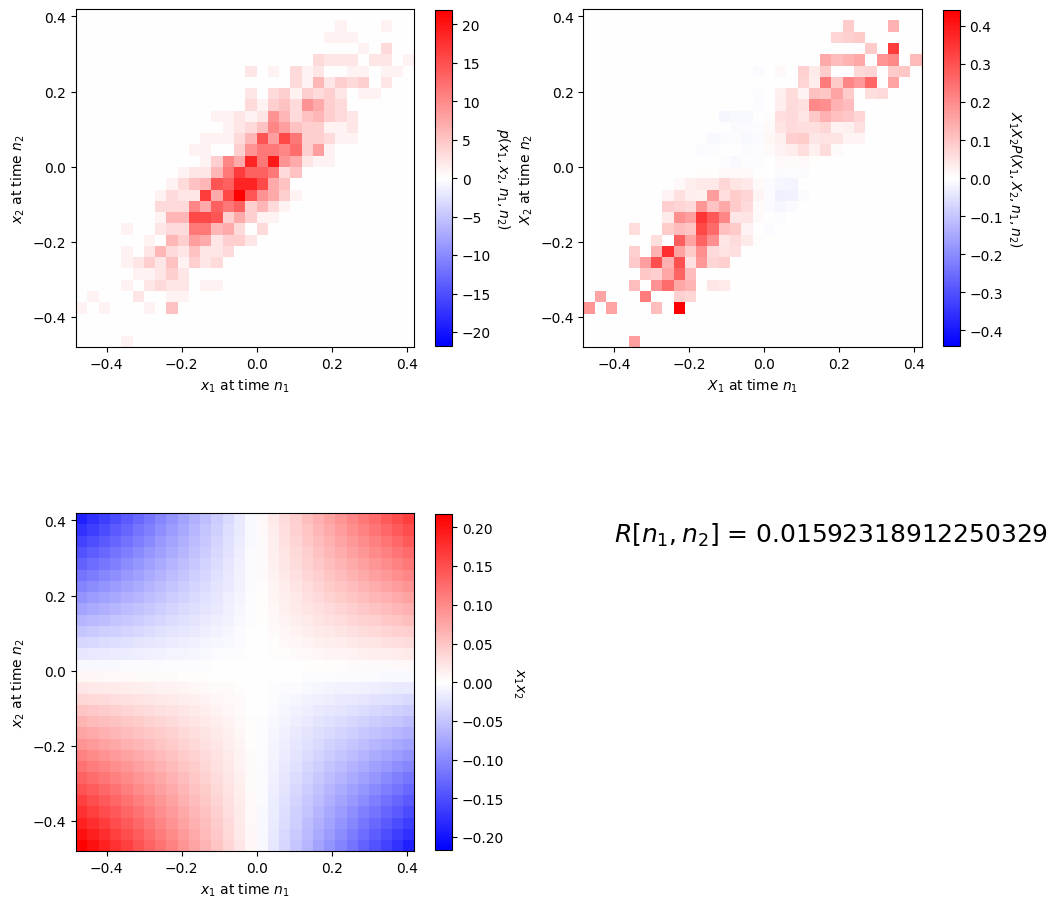

In [28]:
# >>>>>>>>>>>>>>>>> #corrcoef_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
n1 = 10      # <--- selection of the sample, change to other if you want
n2 = 11      # <--- selection of the sample, change to other if you want
DELTA = 0.03 # step - better for 2D ...
data1 = WATER[:,n1]
data2 = WATER[:,n2]
datamin = np.min(np.concatenate((data1, data2)))   # better analyze both ...
datamax = np.max(np.concatenate((data1, data2)))   # better analyze both ...
bins = np.arange(datamin,datamax,DELTA)   # let the data decide ... no margin here
x1 = bins[:-1]
x2 = bins[:-1]

#--- 2d histogram ---
jointhist,_,_ = np.histogram2d(data1, data2, bins=(bins,bins))
px1x2n1n2 = jointhist / OMEGAwater / DELTA ** 2

fig, ax = plt.subplots(2,2, figsize=(12,12))  # some heavy colormap tweaking ...
# show joint PDF
im=ax[0,0].pcolormesh(x1, x2, px1x2n1n2, cmap='bwr', vmin=-np.max(px1x2n1n2), vmax = np.max(px1x2n1n2))
ax[0,0].set_aspect('equal')
ax[0,0].set_xlabel('$x_1$ at time $n_1$')
ax[0,0].set_ylabel('$x_2$ at time $n_2$')
cbar = plt.colorbar(im, ax = ax[0,0], shrink=0.80)
cbar.set_label('$p(x_1, x_2, n_1, n_2)$', rotation=270, labelpad=15)
# show x1 * x2
x1x2 = np.tile(x1, (x2.size, 1)) *  np.tile(x2, (x1.size, 1)).T
im=ax[1,0].pcolormesh(x1, x2, x1x2, cmap='bwr', vmin=-np.max(np.abs(x1x2)), vmax = +np.max(np.abs(x1x2)))
ax[1,0].set_aspect('equal')
ax[1,0].set_xlabel('$x_1$ at time $n_1$')
ax[1,0].set_ylabel('$x_2$ at time $n_2$')
cbar = plt.colorbar(im, ax = ax[1,0], shrink=0.80)
cbar.set_label('$x_1 x_2$', rotation=270, labelpad=15)
# show X1 * X2
px1x2n1n2x1x2 = px1x2n1n2 * x1x2
im=ax[0,1].pcolormesh(x1, x2, px1x2n1n2x1x2, cmap='bwr', vmin=-np.max(np.abs(px1x2n1n2x1x2)), vmax = +np.max(np.abs(px1x2n1n2x1x2)))
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel('$X_1$ at time $n_1$')
ax[0,1].set_ylabel('$X_2$ at time $n_2$')
cbar = plt.colorbar(im, ax = ax[0,1], shrink=0.80)
cbar.set_label('$X_1 X_2 P(X_1, X_2, n_1, n_2)$', rotation=270, labelpad=15)
# show the corr coef
fig.delaxes(ax[1,1])
Rn1n2 = np.sum(px1x2n1n2x1x2) * DELTA**2
ax[0,1].text(-0.4, -1, f'$R[n_1, n_2]$ = {Rn1n2}',fontsize=18)


In [19]:
# >>>>>>>>>>>>>>>>> #corrcoef_estimation_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
for n1,n2 in [[10,11], [10,10], [20,23]]:
    data1 = ROULETTE[:,n1].astype(float)  # this IS NECESSARY ! Otherwise screws up !
    data2 = ROULETTE[:,n2].astype(float)  # this IS NECESSARY ! Otherwise screws up !
    Rn1n2 = np.sum(data1 * data2) / OMEGAroulette
    print(f'correlation coefficient R[{n1}, {n2}] = {Rn1n2}')


correlation coefficient R[10, 11] = 323.656
correlation coefficient R[10, 10] = 435.65797260273973
correlation coefficient R[20, 23] = 326.10131506849314


In [20]:
# >>>>>>>>>>>>>>>>> #corrcoef_estimation_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
for n1,n2 in [[10,11], [10,10], [10,16], [10,23]]:
    data1 = WATER[:,n1]
    data2 = WATER[:,n2]
    Rn1n2 = np.sum (data1 * data2) / OMEGAwater
    print(f'correlation coefficient R[{n1}, {n2}] = {Rn1n2}')


correlation coefficient R[10, 11] = 0.01581002353282457
correlation coefficient R[10, 10] = 0.01940616150473834
correlation coefficient R[10, 16] = -0.00091552756698837
correlation coefficient R[10, 23] = -0.014224342639080147


Text(0, 0.5, '$R[n_1, n_2]$')

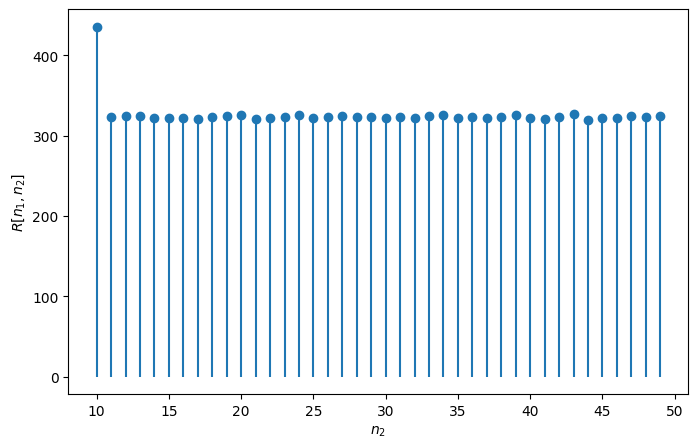

In [31]:
# >>>>>>>>>>>>>>>>> #corrcoef_sequence_discrete <<<<<<<<<<<<<<<<<<<<<<<<<
n2s = np.arange(10,50)
n1 = 10
Rs = np.zeros(n2s.shape)
for ii,n2 in enumerate(n2s):
    data1 = ROULETTE[:,n1].astype(float)  # this IS NECESSARY ! Otherwise screws up !
    data2 = ROULETTE[:,n2].astype(float)  # this IS NECESSARY ! Otherwise screws up !
    Rs[ii] = np.sum(data1 * data2) / OMEGAroulette
plt.figure(figsize=(8,5))
plt.stem(n2s,Rs,basefmt=" ")
plt.gca().set_xlabel('$n_2$')
plt.gca().set_ylabel('$R[n_1, n_2]$')


Text(0, 0.5, '$R[n_1, n_2]$')

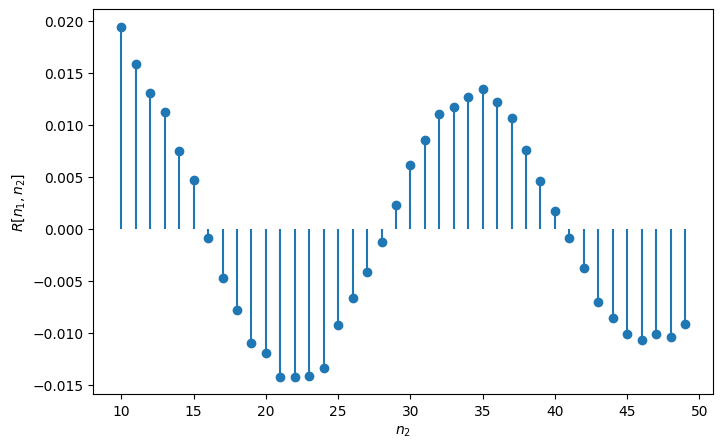

In [22]:
# >>>>>>>>>>>>>>>>> #corrcoef_sequence_continuous <<<<<<<<<<<<<<<<<<<<<<<<<
n2s = np.arange(10,50)
n1 = 10
Rs = np.zeros(n2s.shape)
for ii,n2 in enumerate(n2s):
    data1 = WATER[:,n1]
    data2 = WATER[:,n2]
    Rs[ii] = np.sum(data1 * data2) / OMEGAwater
plt.figure(figsize=(8,5))
plt.stem(n2s,Rs,basefmt=" ")
plt.gca().set_xlabel('$n_2$')
plt.gca().set_ylabel('$R[n_1, n_2]$')


In [23]:
# ...  the rest was moved to random_2